In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPool2D,AveragePooling2D,GlobalMaxPooling2D,BatchNormalization,InputLayer
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/Flow_profile.zip'

Archive:  /content/drive/MyDrive/Flow_profile.zip
   creating: Flow_profile/test/
   creating: Flow_profile/test/laminar/
  inflating: Flow_profile/test/laminar/Screenshot 2024-05-09 015422 - Copy.png  
  inflating: Flow_profile/test/laminar/Screenshot 2024-05-09 015422.png  
  inflating: Flow_profile/test/laminar/Screenshot 2024-05-09 015535 - Copy.png  
  inflating: Flow_profile/test/laminar/Screenshot 2024-05-09 015535.png  
  inflating: Flow_profile/test/laminar/Screenshot 2024-05-09 015812.png  
  inflating: Flow_profile/test/laminar/Screenshot 2024-05-09 015929.png  
  inflating: Flow_profile/test/laminar/Screenshot 2024-05-09 020254.png  
  inflating: Flow_profile/test/laminar/Screenshot 2024-05-09 020321.png  
  inflating: Flow_profile/test/laminar/Screenshot 2024-05-09 021034.png  
  inflating: Flow_profile/test/laminar/Screenshot 2024-05-09 021208.png  
  inflating: Flow_profile/test/laminar/Screenshot 2024-05-09 021247.png  
   creating: Flow_profile/test/turbulent/
  inflat

In [6]:
data_path="/content/Flow_profile/train"
test_path="/content/Flow_profile/test"
data_gen = ImageDataGenerator(
    rescale=1./255.,
    horizontal_flip = True,
    vertical_flip = True,
    # rotation_range=15,
    # zoom_range=0.2
)
data=data_gen.flow_from_directory(directory = data_path,

    target_size = (224,224), # image height , image width
    class_mode="categorical",
    batch_size=32,
    shuffle=True
)
test=data_gen.flow_from_directory(directory = test_path,

    target_size = (224,224), # image height , image width
    class_mode="categorical",
    batch_size=32,
    shuffle=True
)


Found 347 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [6]:
# train,test=train_test_split(data,test_size=0.2,random_state=42)

In [7]:
tf.random.set_seed(1234)
model=Sequential(
    [
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        MaxPooling2D(pool_size=(2, 2)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256,activation='relu'),
        Dropout(0.4),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')]
)

In [15]:
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss='categorical_crossentropy',metrics=['accuracy']
    )

In [16]:
model1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',metrics=['accuracy']
    )

In [27]:
history = model.fit(data,
                              validation_data=test,
                              epochs=10,
                    )

Epoch 1/10
11/11 [==============================] - 24s 2s/step - loss: 0.6922 - accuracy: 0.5216 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 2/10
11/11 [==============================] - 24s 2s/step - loss: 0.6937 - accuracy: 0.5360 - val_loss: 0.6962 - val_accuracy: 0.5000
Epoch 3/10
11/11 [==============================] - 23s 2s/step - loss: 0.6924 - accuracy: 0.5216 - val_loss: 0.6984 - val_accuracy: 0.5000
Epoch 4/10
11/11 [==============================] - 25s 2s/step - loss: 0.6917 - accuracy: 0.5360 - val_loss: 0.6970 - val_accuracy: 0.5000
Epoch 5/10
11/11 [==============================] - 22s 2s/step - loss: 0.6922 - accuracy: 0.5360 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 6/10
11/11 [==============================] - 27s 2s/step - loss: 0.6935 - accuracy: 0.5360 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 7/10
11/11 [==============================] - 22s 2s/step - loss: 0.6926 - accuracy: 0.5360 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 8/10
11/11 [==

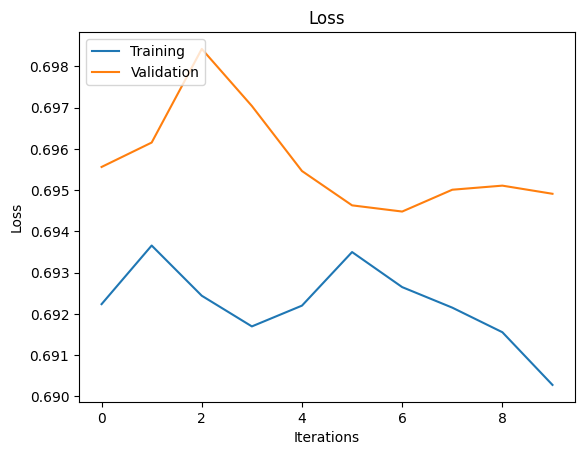

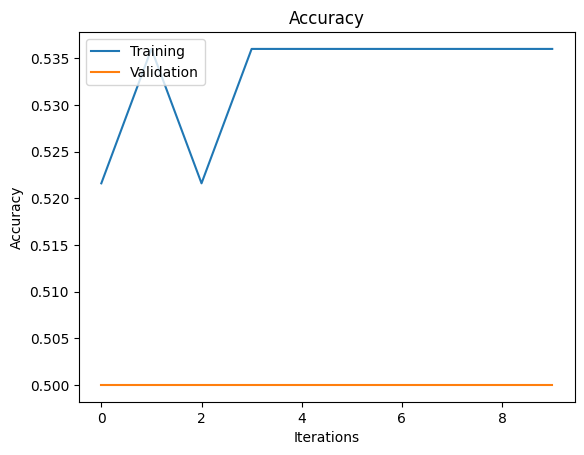

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [21]:
history1 = model1.fit(data,
                              validation_data=test,
                              epochs=10,
                    )

Epoch 1/10
11/11 [==============================] - 58s 5s/step - loss: 0.1071 - accuracy: 0.9597 - val_loss: 0.0391 - val_accuracy: 1.0000
Epoch 2/10
11/11 [==============================] - 45s 4s/step - loss: 0.0652 - accuracy: 0.9798 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 3/10
11/11 [==============================] - 45s 4s/step - loss: 0.0713 - accuracy: 0.9769 - val_loss: 0.0274 - val_accuracy: 1.0000
Epoch 4/10
11/11 [==============================] - 44s 4s/step - loss: 0.0317 - accuracy: 0.9942 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 5/10
11/11 [==============================] - 44s 4s/step - loss: 0.0386 - accuracy: 0.9856 - val_loss: 9.0326e-04 - val_accuracy: 1.0000
Epoch 6/10
11/11 [==============================] - 45s 4s/step - loss: 0.0491 - accuracy: 0.9856 - val_loss: 0.4769 - val_accuracy: 0.9091
Epoch 7/10
11/11 [==============================] - 44s 4s/step - loss: 0.0417 - accuracy: 0.9856 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 8/10
11/11

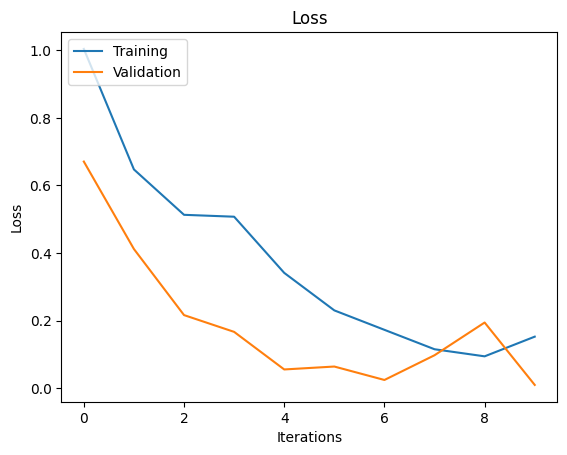

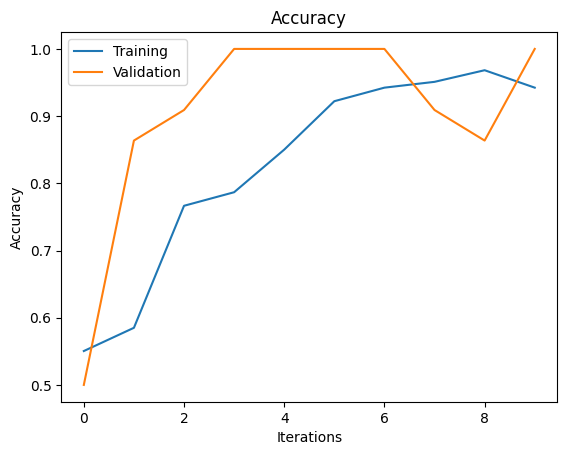

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()